# Scenario 06 generation (run with metric-dev)
- Part A generates n_cells x 2 data
- Part B generates n_cells x 2000 data

In [1]:
folder_date = "2025-07-03"
scenario = "scenario_06"

In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [3]:
results_dir = f"results/{folder_date}/out"
# os.makedirs(results_dir, exist_ok=True)
results_dir

'results/2025-07-03/out'

### Part A

In [4]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of cells
n_cells_batch1 = 1000
n_cells_batch2 = 600

# Cell types
n_type1_batch1 = 600
n_type2_batch1 = 400

n_type1_batch2 = 500  # 100 in dense cluster close to cluster1 + 400 away
n_type2_batch2 = 100

# Generate clusters
# Type 2 Batch 1: dense cluster at (0, 0)
cluster1 = np.random.normal(loc=[0, 0], scale=0.2, size=(n_type2_batch1, 2))

# Type 2 Batch 2: dense cluster at (1.5, 0)
cluster2 = np.random.normal(loc=[-0.5, 0], scale=0.2, size=(n_type2_batch2, 2))

# Type 1 Batch 2 (100 cells): dense cluster at (-1.5, 0)
cluster3 = np.random.normal(loc=[0.5, 10], scale=0.1, size=(100, 2))

# Remaining Type 1 Batch 1 cells: dense cluster far away at (10, 10)
cluster4 = np.random.normal(loc=[10, 10], scale=0.3, size=(n_type1_batch1 - 100, 2))

# Combine all clusters
data = np.vstack([cluster1, cluster2, cluster3, cluster4])

# Create corresponding labels
labels = (
    ['Batch1_Type2'] * n_type2_batch1 +
    ['Batch2_Type2'] * n_type2_batch2 +
    ['Batch2_Type1'] * 100 +
    ['Batch1_Type1'] * (n_type1_batch1 - 100)
)

# Batches and cell types separately
batches = (
    ['Batch1'] * n_type2_batch1 +
    ['Batch2'] * n_type2_batch2 +
    ['Batch2'] * 100 +
    ['Batch1'] * (n_type1_batch1 - 100)
)

cell_types = (
    ['Type2'] * n_type2_batch1 +
    ['Type2'] * n_type2_batch2 +
    ['Type1'] * 100 +
    ['Type1'] * (n_type1_batch1 - 100)
)

# Create DataFrame
df = pd.DataFrame(data, columns=['X', 'Y'])
df['batch'] = batches
df['cell_type'] = cell_types
df['Label'] = labels



In [5]:
labels = df["Label"]
# Split labels into batch and type
cell_types = [label.split('_')[0] for label in labels]
batches = [label.split('_')[1] for label in labels]

# Create a DataFrame
meta_df = pd.DataFrame({
    'Batch': batches,
    'CellType': cell_types
})

# Create contingency table
contingency_table = pd.crosstab(meta_df['Batch'], meta_df['CellType'])
contingency_table

CellType,Batch1,Batch2
Batch,,
Type1,500,100
Type2,400,100


In [6]:
df

,X,Y,batch,cell_type,Label
0,0.099343,-0.027653,Batch1,Type2,Batch1_Type2
1,0.129538,0.304606,Batch1,Type2,Batch1_Type2
2,-0.046831,-0.046827,Batch1,Type2,Batch1_Type2
3,0.315843,0.153487,Batch1,Type2,Batch1_Type2
4,-0.093895,0.108512,Batch1,Type2,Batch1_Type2
...,...,...,...,...,...
1095,9.520563,10.138652,Batch1,Type1,Batch1_Type1
1096,10.607293,9.591048,Batch1,Type1,Batch1_Type1
1097,10.056912,9.801405,Batch1,Type1,Batch1_Type1
1098,10.127766,10.005744,Batch1,Type1,Batch1_Type1


In [7]:
#convert to anndata
adata = sc.AnnData(np.random.rand(1100, 600))
adata.obs = df

In [8]:
adata.obsm["X_pca"] = np.array(df[["X", "Y"]])
adata.obsm["X_umap"] = np.array(df[["X", "Y"]])

In [11]:
adata

AnnData object with n_obs × n_vars = 1100 × 600
    obs: 'X', 'Y', 'batch', 'cell_type', 'Label'
    obsm: 'X_pca', 'X_umap'

In [10]:
adata.X

array([[0.47690011, 0.71833118, 0.24734032, ..., 0.80666505, 0.85802327,
        0.9976283 ],
       [0.24149649, 0.04035083, 0.41119152, ..., 0.26817437, 0.36107473,
        0.40845558],
       [0.67969722, 0.05668043, 0.0346727 , ..., 0.89699529, 0.84612421,
        0.18281339],
       ...,
       [0.02245632, 0.09951802, 0.07028588, ..., 0.36341283, 0.83501264,
        0.66438833],
       [0.41162097, 0.49570216, 0.14049282, ..., 0.8512561 , 0.5676251 ,
        0.01997402],
       [0.70856548, 0.88559218, 0.31512955, ..., 0.32853572, 0.97065691,
        0.25202568]])

In [ ]:
adata.write("scenarios/2025-06-01_scenario_06.h5ad")

### Part B

In [4]:
np.random.seed(42)

In [5]:
n_cells_batch1 = 900
n_cells_batch2 = 200

In [6]:
n_type1_batch1 = 500
n_type1_batch2 = 100

n_type2_batch1 = 400
n_type2_batch2 = 100

In [7]:
# cluster1: Type2-Batch1 at [0, 0], scale=0.2, size=400
cluster1 = np.random.normal(loc=[0.0, 0.0], scale=0.2, size=(n_type2_batch1, 2))

# cluster2: Type2-Batch2 at [-0.5, 0], scale=0.2, size=100
cluster2 = np.random.normal(loc=[-0.5, 0.0], scale=0.2, size=(n_type2_batch2, 2))

# cluster3: Type1-Batch2 at [0.5, 10], scale=0.1, size=100
cluster3 = np.random.normal(loc=[0.5, 10.0], scale=0.1, size=(n_type1_batch2, 2))

# cluster4: Type1-Batch1 at [10, 10], scale=0.3, size=500
cluster4 = np.random.normal(loc=[10.0, 10.0], scale=0.3, size=(n_type1_batch1, 2))

Z = np.vstack([cluster1, cluster2, cluster3, cluster4])
Z.shape

(1100, 2)

In [8]:
Z

array([[ 0.09934283, -0.02765286],
       [ 0.12953771,  0.30460597],
       [-0.04683067, -0.04682739],
       ...,
       [10.05691185,  9.80140535],
       [10.12776616, 10.00574433],
       [ 9.80755393, 10.14636169]])

In [9]:
# labels aligned to stacking order
labels = (
    ['Batch1_Type2'] * n_type2_batch1 +
    ['Batch2_Type2'] * n_type2_batch2 +
    ['Batch2_Type1'] * n_type1_batch2 +
    ['Batch1_Type1'] * n_type1_batch1
)

batches = (
    ['Batch1'] * n_type2_batch1 +
    ['Batch2'] * n_type2_batch2 +
    ['Batch2'] * n_type1_batch2 +
    ['Batch1'] * n_type1_batch1
)

cell_types = (
    ['Type2'] * n_type2_batch1 +
    ['Type2'] * n_type2_batch2 +
    ['Type1'] * n_type1_batch2 +
    ['Type1'] * n_type1_batch1
)

meta = pd.DataFrame({
    'batch': batches,
    'cell_type': cell_types
})

meta

,batch,cell_type
0,Batch1,Type2
1,Batch1,Type2
2,Batch1,Type2
3,Batch1,Type2
4,Batch1,Type2
...,...,...
1095,Batch1,Type1
1096,Batch1,Type1
1097,Batch1,Type1
1098,Batch1,Type1


##### Lift 2-D data to 2000-D: X = Z @ W^T + E

In [10]:
n_genes = 2000

noise_sigma = 0.1   # shrink if PCs are too spread out; increase if PCs are too close together

In [11]:
# create n_genes x 2 matrix
A = np.random.normal(size=(n_genes, 2))
A.shape

(2000, 2)

In [12]:
# QR decomposition to get orthogonal matrix Q
Q, R = np.linalg.qr(A)
Q.shape, R.shape

((2000, 2), (2, 2))

In [13]:
W = Q
X_signal = Z @ W.T
X_signal.shape

(1100, 2000)

In [14]:
E = np.random.normal(scale=noise_sigma, size=X_signal.shape)
E.shape

(1100, 2000)

In [15]:
# final 2000-D data matrix
X = X_signal + E
X.shape

(1100, 2000)

In [16]:
# apply PCA to verify
pca = PCA(n_components=2, random_state=42)
PC = pca.fit_transform(X)
df_pc = pd.DataFrame(PC, columns=['PC1', 'PC2']).join(meta)
df_pc.head()

,PC1,PC2,batch,cell_type
0,-6.998170,-0.497353,Batch1,Type2
1,-6.725497,-0.492069,Batch1,Type2
2,-7.039608,-0.658465,Batch1,Type2
3,-6.915727,-0.777090,Batch1,Type2
4,-6.961921,-0.451439,Batch1,Type2


In [17]:
print("Shapes — Z:", Z.shape, "| X:", X.shape, "| PC:", PC.shape)
print("Explained variance ratio (PC1, PC2):", pca.explained_variance_ratio_[:2])

Shapes — Z: (1100, 2) | X: (1100, 2000) | PC: (1100, 2)
Explained variance ratio (PC1, PC2): [0.65996779 0.05385725]


##### Plot: color by batch, marker shape by cell type

In [18]:
# color map for batches
batch_order = sorted(df_pc['batch'].unique())
batch_order

['Batch1', 'Batch2']

In [19]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#1f77b4',
 '#ff7f0e',
 '#2ca02c',
 '#d62728',
 '#9467bd',
 '#8c564b',
 '#e377c2',
 '#7f7f7f',
 '#bcbd22',
 '#17becf']

In [20]:
batch2color = {b: colors[i % len(colors)] for i, b in enumerate(batch_order)}
batch2color

{'Batch1': '#1f77b4', 'Batch2': '#ff7f0e'}

In [21]:
# marker map for cell types
ctype_order = sorted(df_pc['cell_type'].unique())  # e.g., ['Type1', 'Type2']
markers = ['o', 's', '^', 'D', 'P', 'X']           # enough shapes if more types appear
ctype2marker = {ct: markers[i % len(markers)] for i, ct in enumerate(ctype_order)}

ctype2marker

{'Type1': 'o', 'Type2': 's'}

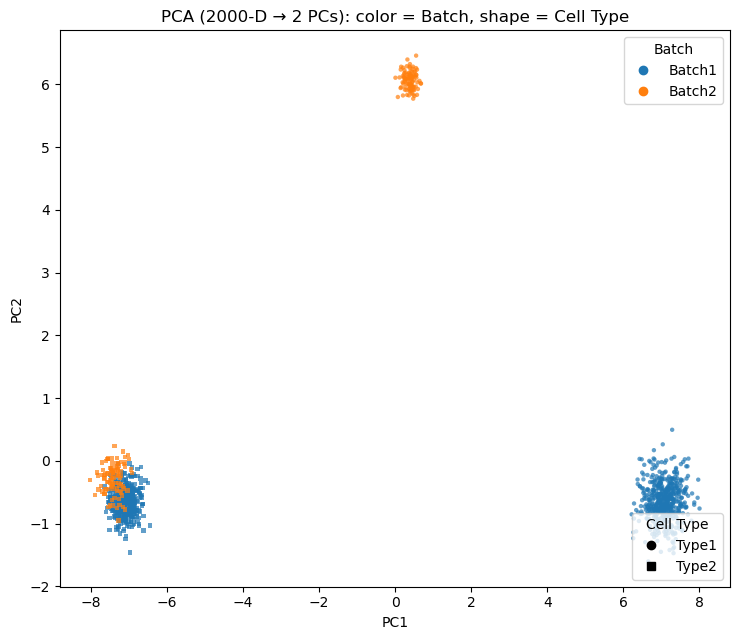

In [22]:
plt.figure(figsize=(7.5, 6.5))
for ct in ctype_order:
    for b in batch_order:
        mask = (df_pc['cell_type'] == ct) & (df_pc['batch'] == b)
        if not mask.any():
            continue
        plt.scatter(
            df_pc.loc[mask, 'PC1'],
            df_pc.loc[mask, 'PC2'],
            s=10,
            alpha=0.7,
            marker=ctype2marker[ct],
            c=batch2color[b],
            edgecolor='none',
            label=f"{ct} • {b}"
        )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA (2000-D → 2 PCs): color = Batch, shape = Cell Type")

# Create two clean legends (one for color/batch, one for marker/ctype)
batch_handles = [Line2D([0], [0], marker='o', linestyle='',
                        color=batch2color[b], label=b) for b in batch_order]
ctype_handles = [Line2D([0], [0], marker=ctype2marker[ct], linestyle='',
                        color='black', label=ct) for ct in ctype_order]

legend1 = plt.legend(handles=batch_handles, title="Batch", loc='upper right')
plt.gca().add_artist(legend1)
plt.legend(handles=ctype_handles, title="Cell Type", loc='lower right')

plt.tight_layout()
plt.show()


##### Save as anndata

In [23]:
adata = sc.AnnData(X)
adata.obs = df_pc[['batch', 'cell_type']]

adata

AnnData object with n_obs × n_vars = 1100 × 2000
    obs: 'batch', 'cell_type'

In [24]:
adata.X

array([[-0.05912116, -0.11052128,  0.231028  , ...,  0.21385785,
         0.22412093,  0.00884924],
       [-0.39021613,  0.11284366, -0.04805631, ...,  0.10994185,
         0.13009719,  0.02915008],
       [ 0.03126802,  0.02351137,  0.04741697, ...,  0.01469667,
        -0.08584642,  0.00180107],
       ...,
       [-0.47832468, -0.36819346,  0.25202031, ...,  0.69411421,
         0.24020729, -0.14013472],
       [-0.52095189, -0.51686216,  0.50243352, ...,  0.66921538,
         0.03845464, -0.10341513],
       [-0.3988759 , -0.611997  ,  0.39572608, ...,  0.58092722,
         0.23680627,  0.0671919 ]])

In [25]:
adata.X.mean(), adata.X.min(), adata.X.max()

(np.float64(-0.0027937208311129796),
 np.float64(-1.3834127124799787),
 np.float64(1.478640660170889))

In [26]:
adata.write("scenarios/2025-06-01_scenario_06_n_genes_2000.h5ad")

/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
/home/mekan/anaconda3/envs/metric-dev/lib/python3.11/site-packages/anndata/_core/anndata.py:1146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[key] = c
